In [60]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import corner

plt.style.use('~/vedant.mplstyle')

In [61]:
from astropy.table import Table

In [62]:
cat = 'h3cal'
ver = 'V0.0'

In [63]:
samplef = '/n/holyscratch01/conroy_lab/vchandra/mage/samples/%s/%s/' % (cat, ver)

In [64]:
files = glob.glob(samplef + '*')

In [65]:
ii = 0

In [66]:
file = files[ii]

In [67]:
samp = Table.read(file,format='ascii')

In [68]:
samp['Pr'] = np.exp(samp['log(wt)']-samp['log(z)'][-1])
samp = samp[samp['Pr'] > 1E-10]

In [69]:
pcol = ['Vrad', 'Vrot', 'Dist', 'Av', 'EEP', '[Fe/H]', '[a/Fe]', 'pc_0', 'pc_1', 'pc_2', 'pc_3', 'Teff', 'log(g)']

In [70]:
samp[pcol]

Vrad,Vrot,Dist,Av,EEP,[Fe/H],[a/Fe],pc_0,pc_1,pc_2,pc_3,Teff,log(g)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-143.76229153684147,31.303983039338146,26830.741231585518,0.16739677137064787,568.4990960326575,-0.24765176682878634,-0.19330638078100656,1.0820534871898517,0.09591786822422953,-0.017065922840765607,-0.17170639874959925,4699.047749203964,2.0125276250886586
-144.51595632418014,33.400010718246534,26599.841114060473,0.16802520074930585,568.0481107114854,-0.25096939175017247,-0.1928442667635771,1.0775872400050788,0.09774644282576667,-0.025892005388248332,-0.17795682510001484,4712.852059258214,2.0344668089051816
-145.13837635320806,35.22884779190534,28455.295001541384,0.1643263143788584,572.195050022993,-0.26685402736661257,-0.19326952488618104,1.0780226085151279,0.09058749376591274,-0.023944010854610277,-0.17588764478688892,4687.340422067859,1.975344979597543
-145.35764345147703,35.648873527936296,28165.946229757003,0.15389345066448873,572.0616543838303,-0.26037612180221337,-0.19340529071932464,1.0780305531653513,0.0995670345650721,-0.022841793607674167,-0.1734307627389738,4687.6277714992375,1.980451827263503
-145.16560912085083,31.651595775217867,26822.593035688707,0.17133622542345775,569.2990190170497,-0.2483048022166487,-0.19320264620561925,1.0806632459032606,0.097904788133248,-0.017348361240964685,-0.17319733435794776,4699.6057676848095,2.0118505925052848
-144.97977102559975,34.98487235943844,28113.517610408384,0.16258993590962795,570.7543760850417,-0.2613927842974543,-0.19334067437672775,1.0804761715874642,0.09235993483065554,-0.020611312595069185,-0.1724249874661597,4689.476841249691,1.984897247193071
-144.9422986059235,30.495032693000415,28034.15312366655,0.1707657573598948,572.3399531483077,-0.2752040921624931,-0.19319245216663847,1.075650492426734,0.10104497775722093,-0.02259595374493088,-0.17572672690285213,4687.2543742256175,1.970582630213926
-143.53526956643418,29.070050312994635,26609.161782447845,0.17241224480480896,567.1035567833887,-0.2458955297333726,-0.19309417256938013,1.0803004441075588,0.09488862853831076,-0.019202424245475556,-0.17590503809608388,4708.736014657327,2.032336082198615
-145.32745452867778,31.06140489867344,28157.221477878444,0.16914079886214234,572.3218192032532,-0.27893402071635537,-0.19338108243630642,1.0723023052970757,0.09649156852487963,-0.021759613462364397,-0.1802390362217349,4699.283335503333,1.9878190145409074


In [71]:
samp

Iter,Vrad,Vrot,Dist,Av,EEP,initial_[Fe/H],initial_[a/Fe],initial_Mass,pc_0,pc_1,pc_2,pc_3,Inst_R,Teff,log(g),log(R),[Fe/H],[a/Fe],log(Age),Mass,log(L),Agewgt,log(lk),log(vol),log(wt),h,nc,log(z),delta(log(z)),Pr
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
3313,-143.76229153684147,31.303983039338146,26830.741231585518,0.16739677137064787,568.4990960326575,-0.2570613833862243,-0.19986442646478475,1.843458984355014,1.0820534871898517,0.09591786822422953,-0.017065922840765607,-0.17170639874959925,nan,4699.047749203964,2.0125276250886586,1.3451675660111102,-0.24765176682878634,-0.19330638078100656,9.06935219249003,1.8406258281388197,2.3318568915692177,3.0429392827601305e-05,-30469.710850471867,-65.62590685953914,-30539.346934482874,65.85023311451368,25,-30536.918114858694,18.877763514901744,1.0215773743471911e-10
3314,-144.51595632418014,33.400010718246534,26599.841114060473,0.16802520074930585,568.0481107114854,-0.26040665616040704,-0.19940206630876675,1.8464371615616606,1.0775872400050788,0.09774644282576667,-0.025892005388248332,-0.17795682510001484,nan,4712.852059258214,2.0344668089051816,1.334560364292498,-0.25096939175017247,-0.1928442667635771,9.066526901315155,1.8436581910963734,2.315738283968251,3.0556299688860686e-05,-30469.635278536512,-65.64570948683532,-30539.230083276594,65.88162499289683,25,-30536.823654079428,18.765691190070356,1.1482041171624702e-10
3315,-145.13837635320806,35.22884779190534,28455.295001541384,0.1643263143788584,572.195050022993,-0.2763538381860178,-0.19982735431840204,1.8497341433300414,1.0780226085151279,0.09058749376591274,-0.023944010854610277,-0.17588764478688892,nan,4687.340422067859,1.975344979597543,1.364494335710207,-0.26685402736661257,-0.19326952488618104,9.0616087611827,1.8468047382243824,2.3661769811958133,2.9250546723498755e-05,-30469.473285099244,-65.66551211413149,-30539.128540283607,65.91301286757152,25,-30536.72855287288,18.651427784363477,1.2709213088245202e-10
3316,-145.35764345147703,35.648873527936296,28165.946229757003,0.15389345066448873,572.0616543838303,-0.26985016749494983,-0.19996313526474996,1.8508676536416016,1.0780305531653513,0.0995670345650721,-0.022841793607674167,-0.1734307627389738,nan,4687.6277714992375,1.980451827263503,1.3620763871305495,-0.26037612180221337,-0.19340529071932464,9.06199439742577,1.8479591789039718,2.361447575510297,2.9204233676134968e-05,-30469.37180979786,-65.68531474142766,-30539.018598592687,65.94487939192186,25,-30536.632096230445,18.536523951486743,1.4186188655472506e-10
3317,-145.16560912085083,31.651595775217867,26822.593035688707,0.17133622542345775,569.2990190170497,-0.2577524706212255,-0.19976020834797487,1.8483514523957871,1.0806632459032606,0.097904788133248,-0.017348361240964685,-0.17319733435794776,nan,4699.6057676848095,2.0118505925052848,1.346090056703211,-0.2483048022166487,-0.19320264620561925,9.065931817210142,1.8455261098405165,2.3339081530099235,3.043217902498461e-05,-30469.022045527345,-65.70511736872383,-30538.798853473476,65.99270707654432,25,-30536.523646868864,18.420264682852576,1.7672574605464366e-10
3318,-144.97977102559975,34.98487235943844,28113.517610408384,0.16258993590962795,570.7543760850417,-0.2708444226366775,-0.19989861665318917,1.8454085839828445,1.0804761715874642,0.09235993483065554,-0.020611312595069185,-0.1724249874661597,nan,4689.476841249691,1.984897247193071,1.3592050698209304,-0.2613927842974543,-0.19334067437672775,9.065518995398945,1.8424974843795952,2.3563900485722415,2.952801039192017e-05,-30468.824940664763,-65.72491999602,-30538.55558764753,66.05694222545571,25,-30536.400473166632,18.292012695343146,2.2539736237227843e-10
3319,-144.9422986059235,30.495032693000415,28034.15312366655,0.1707657573598948,572.3399531483077,-0.28469470581779754,-0.1997504893874676,1.8467350138751517,1.075650492426734,0

In [72]:
samples = np.lib.recfunctions.structured_to_unstructured(np.array(samp[pcol]))

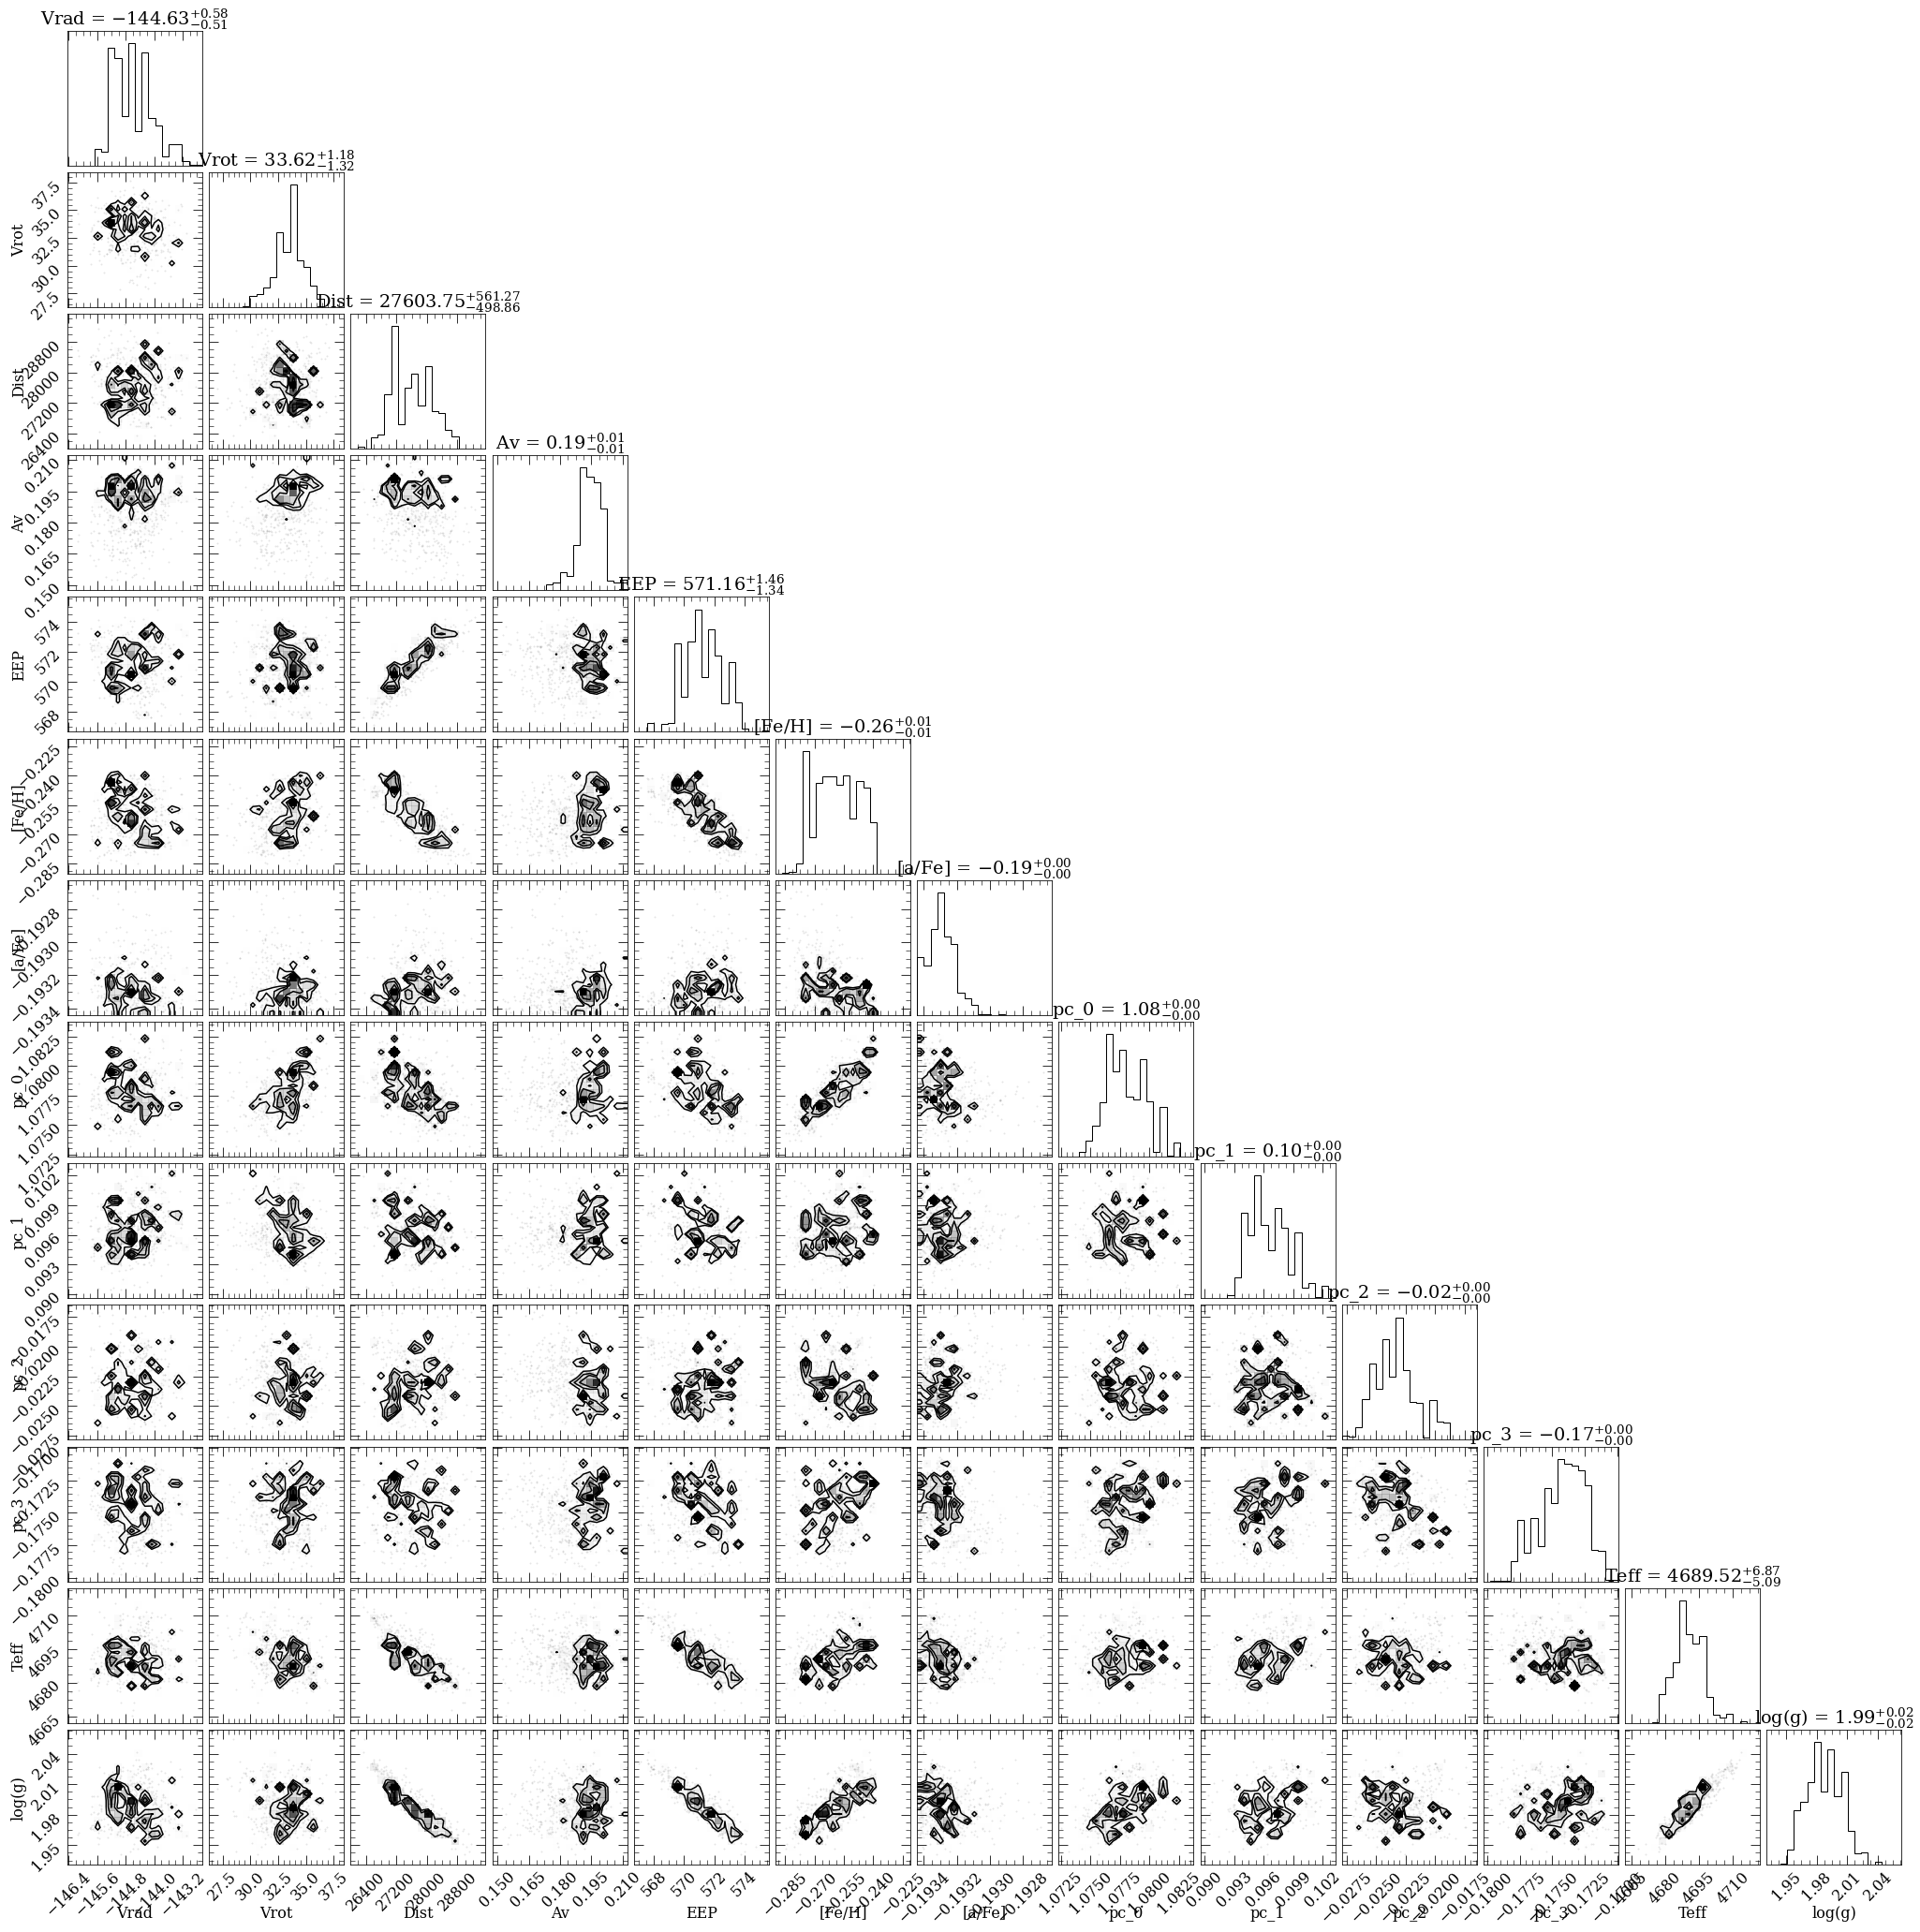

In [75]:
f = corner.corner(samples, labels = pcol, weights = samp['Pr'], show_titles = True);